<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Hyperparameter-Optimization/blob/master/Skopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Skopt 

O Scikit-Optimize, ou skopt, é uma biblioteca simples e eficiente para minimizar as funções da caixa preta (muito) caras e barulhentas. Ele implementa vários métodos para otimização sequencial baseada em modelo. skoptvisa ser acessível e fácil de usar em muitos contextos.


<br>
<hr>

In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.2MB/s 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# dados 
path = '/content/drive/My Drive/Inteligência Artificial - Colab/ML- Supervisionado /Random Forest /data.csv'
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Modelagem 
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


# encoding 
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)


# Standard 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



mdl = RandomForestClassifier(n_estimators=100, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<hr>
<br>

### Random Search 

Pesquisa aleatória por amostragem uniforme dentro dos limites especificados.

<br>

In [5]:
# Random Search 
from skopt import dummy_minimize

In [6]:
def treinar_modelo(params):

    # hiperparâmetros 
    n_estimators = params[0]
    criterion = params[1]
    max_depth = params[2]
    min_samples_split = params[3]
    min_samples_leaf = params[4]
    max_features = params[5]
    class_weight = params[6]
    random_state = params[7]
    

    print(params)
    print('\n')

    # modelo
    mdl = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                      max_features=max_features,
                      class_weight=class_weight,
                      random_state=random_state)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)

    # minimizar a função (inversa da métrica)
    return -accuracy_score(y_test, y_pred)



# spaces
spaces = [(100, 2000, 'log-uniform'),
          (['gini', 'entropy']),
          (1, 30),
          (0.1, 0.8),
          (1, 20),
          (0, 1.0),
          (['balanced_subsample', 'balanced']),
          ([42])]


# Random Search resultados 
resultados_random = dummy_minimize(treinar_modelo, spaces, n_calls=30, verbose=1, random_state=42)

Iteration No: 1 started. Evaluating function at random point.
[1087, 'gini', 8, 0.5190609389379257, 7, 0.44583275285359125, 'balanced_subsample', 42]


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.4727
Function value obtained: -0.9298
Current minimum: -0.9298
Iteration No: 2 started. Evaluating function at random point.
[272, 'gini', 3, 0.11440914600706173, 2, 0.7219987722668249, 'balanced', 42]


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.7604
Function value obtained: -0.9532
Current minimum: -0.9532
Iteration No: 3 started. Evaluating function at random point.
[1954, 'entropy', 26, 0.46732950214256663, 12, 0.02306242504141576, 'balanced', 42]


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.0789
Function value obtained: -0.9649
Current minimum: -0.9649
Iteration No: 4 started. Evaluating function at random point.
[115, 'entropy', 15, 0.4192489889519252, 15, 0.6183860093330874, 'balanced_subsample', 42]


Itera

In [7]:
# melhores parâmetros 
print(resultados_random.x)

[428, 'gini', 29, 0.25698851662239186, 1, 0.01807536361552087, 'balanced_subsample', 42]


In [8]:
# Modelo Tunado 
treinar_modelo([428, 'gini', 29, 0.25698851662239186, 1, 0.01807536361552087, 'balanced_subsample', 42])

[428, 'gini', 29, 0.25698851662239186, 1, 0.01807536361552087, 'balanced_subsample', 42]




-0.9707602339181286

<br>
<hr>
<br>


### Bayesian Optimization 



Otimização bayesiana usando processos gaussianos.

Se toda avaliação de função é cara, por exemplo, quando os parâmetros são os hiperparâmetros de uma rede neural e a avaliação da função é a pontuação média de validação cruzada em dez dobras, a otimização dos hiperparâmetros pelas rotinas de otimização padrão levaria para sempre!

A idéia é aproximar a função usando um processo gaussiano. Em outras palavras, supõe-se que os valores das funções sigam um gaussiano multivariado. A covariância dos valores das funções é dada por um kernel GP entre os parâmetros. Em seguida, uma escolha inteligente para escolher o próximo parâmetro a ser avaliado pode ser feita pela função de aquisição sobre o prior gaussiano, que é muito mais rápida de avaliar.


<br>


In [9]:
from skopt import gp_minimize

In [10]:
# Bayesian Optimization 

def treinar_modelo(params):

    # hiperparâmetros 
    n_estimators = params[0]
    criterion = params[1]
    max_depth = params[2]
    min_samples_split = params[3]
    min_samples_leaf = params[4]
    class_weight = params[5]
    random_state = params[6]
    

    print(params)
    print('\n')

    # modelo
    mdl = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                      class_weight=class_weight,
                      random_state=random_state)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)

    # minimizar a função (inversa da métrica)
    return -accuracy_score(y_test, y_pred)




# dimensões de hiperparâmetros 
spaces = [(100, 2000, 'log-uniform'),
          (['gini', 'entropy']),
          (1, 30),
          (0.1, 0.8),
          (1, 20),
          (['balanced_subsample', 'balanced']),
          ([42])]



resultados_bayesian = gp_minimize(treinar_modelo, spaces, verbose=1, n_calls=30, random_state=42)

Iteration No: 1 started. Evaluating function at random point.
[1613, 'gini', 24, 0.517795110562541, 9, 'balanced_subsample', 42]


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.3133
Function value obtained: -0.9591
Current minimum: -0.9591
Iteration No: 2 started. Evaluating function at random point.
[734, 'gini', 20, 0.1394881053189702, 15, 'balanced', 42]


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.3416
Function value obtained: -0.9591
Current minimum: -0.9591
Iteration No: 3 started. Evaluating function at random point.
[1985, 'entropy', 19, 0.1049464136538022, 1, 'balanced', 42]


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.6821
Function value obtained: -0.9591
Current minimum: -0.9591
Iteration No: 4 started. Evaluating function at random point.
[189, 'entropy', 8, 0.16342450417297458, 13, 'balanced_subsample', 42]


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5001
Function valu

In [11]:
# melhores parâmetros
resultados_bayesian.x

[1389, 'entropy', 20, 0.1, 15, 'balanced_subsample', 42]

In [12]:
# Hiperparâmetros tunados 
tuning = resultados_bayesian.x
treinar_modelo(tuning)

[1389, 'entropy', 20, 0.1, 15, 'balanced_subsample', 42]




-0.9707602339181286

In [13]:
# mínimo da métrica objetivo 
resultados_bayesian.fun

-0.9707602339181286

In [14]:
# melhores parâmetros 

print('Melhores Parâmetros')
print('\n')

print('n_estimators= {}'.format(resultados_bayesian.x[0]))
print('criterion= {}'.format(resultados_bayesian.x[1]))
print('max_depth= {}'.format(resultados_bayesian.x[2]))

Melhores Parâmetros


n_estimators= 1389
criterion= entropy
max_depth= 20


In [15]:
# Random Serarch x Bayesian Optimization 
from skopt.plots import plot_convergence 

In [16]:
# Espaço de buscas 
resultados_bayesian.space

Space([Integer(low=100, high=2000, prior='uniform', transform='normalize'),
       Categorical(categories=('gini', 'entropy'), prior=None),
       Integer(low=1, high=30, prior='uniform', transform='normalize'),
       Real(low=0.1, high=0.8, prior='uniform', transform='normalize'),
       Integer(low=1, high=20, prior='uniform', transform='normalize'),
       Categorical(categories=('balanced_subsample', 'balanced'), prior=None),
       Categorical(categories=(42,), prior=None)])

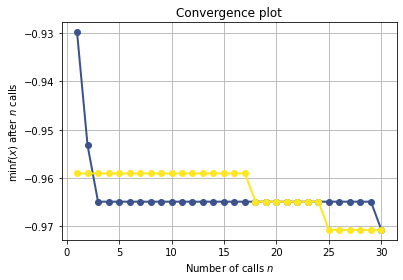

In [17]:
plot_convergence(resultados_random, resultados_bayesian)

### BayesSearchCV 

Outra alternativa possível de Otimização bayesiana, com Cross validation aplicado. 

<br>

In [18]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [19]:
# espaços de busca 
spaces_bayesian = {'n_estimators': Integer(100,2000, prior='log-uniform'),
                   'max_depth': Real(1,30, prior='uniform'),
                   'criterion': Categorical(['gini', 'entropy'])    
}


bayesian = BayesSearchCV(RandomForestClassifier(), spaces_bayesian, n_iter=30, cv=5, scoring='accuracy', random_state=42)
bayesian.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
              refit=

In [20]:
# melhores parâmetros 
bayesian.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 27.680267566682176),
             ('n_estimators', 1043)])

In [21]:
# melhor modelo
bayesian.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=27.680267566682176,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1043, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [22]:
# melhor acurácia 
bayesian.best_score_

0.9623115577889447

In [23]:
# Validação 
np.mean(bayesian.best_score_)

0.9623115577889447